# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Alif Fadlan Badali]
- **Email:** [fadlanpdh@gmail.com]
- **ID Dicoding:** [dlannnn]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah pengguna sepeda harian?
- Apakah hari kerja berpengaruh terhadap penggunaan sepeda per jam?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:

# make dataframe
data_day = pd.read_csv("data/day.csv", delimiter=",")
data_hour= pd.read_csv("data/hour.csv", delimiter=",")

# merge 2 dataset
new_order_df = pd.merge(
    left=data_day,
    right=data_hour,
    how="inner",
    left_on="instant",
    right_on="instant"
)

# show the dataframe
print(new_order_df)


     instant    dteday_x  season_x  yr_x  mnth_x  holiday_x  weekday_x  \
0          1  2011-01-01         1     0       1          0          6   
1          2  2011-01-02         1     0       1          0          0   
2          3  2011-01-03         1     0       1          0          1   
3          4  2011-01-04         1     0       1          0          2   
4          5  2011-01-05         1     0       1          0          3   
..       ...         ...       ...   ...     ...        ...        ...   
726      727  2012-12-27         1     1      12          0          4   
727      728  2012-12-28         1     1      12          0          5   
728      729  2012-12-29         1     1      12          0          6   
729      730  2012-12-30         1     1      12          0          0   
730      731  2012-12-31         1     1      12          0          1   

     workingday_x  weathersit_x    temp_x  ...  weekday_y  workingday_y  \
0               0             2  0.3

**Insight:**
- proses pengumpulan data yang dibentuk menjadi sebuah dataframe agak proses pengidentifikasian menjadi lebih mudah

### Assessing Data

In [4]:

# check missing value
print("from day.csv")
print(data_day.isnull().sum())

print("\n\nfrom hour.csv")
print(data_hour.isnull().sum())

#check duplicate data from day.csv
print("duplicate data from day.csv : ",data_day.duplicated().sum())

#check duplicate data from hour.csv
print("duplicate data from hour.csv : ",data_hour.duplicated().sum())

print("\n\n")
# show info day dataset
print(data_day.info())
print("\n\n")
#show info hour dataset
print(data_hour.info())

# describe dataset
print("\n\n")
print("DATA DAY")
print(data_day.describe())
print("\n\n")
print("DATA HOUR")
print(data_hour.describe())


from day.csv
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


from hour.csv
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
duplicate data from day.csv :  0
duplicate data from hour.csv :  0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int6

**Insight:**
- proses diatas berguna untuk mengidentifikasi dataset apabila dataset tersebut terdapat masalah yang nantinya akan dibersihkan pada tahap selanjutnya


### Cleaning Data

In [5]:
# check missing value
print("from day.csv")
print(data_day.isnull().sum())

print("\n\nfrom hour.csv")
print(data_hour.isnull().sum())

#drop duplicate data from day.csv
data_day.drop_duplicates(inplace=True)

#drop duplicate data from hour.csv
data_hour.drop_duplicates(inplace=True)

#check duplicate data from day.csv
print("duplicate data from day.csv : ",data_day.duplicated().sum())

#check duplicate data from hour.csv
print("duplicate data from hour.csv : ",data_hour.duplicated().sum())



from day.csv
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


from hour.csv
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
duplicate data from day.csv :  0
duplicate data from hour.csv :  0


**Insight:**
- dalam tahap ini, data telah dibersihkan dari masalah

## Exploratory Data Analysis (EDA)

### Explore ...

In [6]:
data_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [7]:
data_day.groupby(by="season").instant.nunique().sort_values(ascending=False).reset_index().head(10)

,season,instant
0,3,188
1,2,184
2,1,181
3,4,178


In [8]:
data_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [9]:
data_hour.groupby(by="season").instant.nunique().sort_values(ascending=False).reset_index().head(10)

,season,instant
0,3,4496
1,2,4409
2,1,4242
3,4,4232


**Insight:**
- melakukan eksplorasi terhadap sebuah data guna menjawab sebuah pertanyaan bisnis

## Visualization & Explanatory Analysis

### Pertanyaan 1:

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


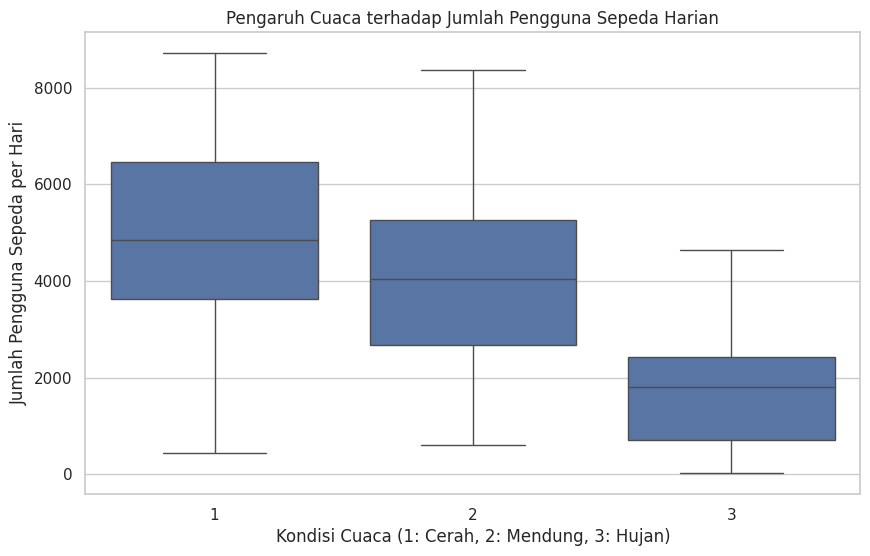

In [10]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Visualisasi Pengaruh Cuaca terhadap Jumlah Pengguna Sepeda Harian
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=data_day)
plt.title('Pengaruh Cuaca terhadap Jumlah Pengguna Sepeda Harian')
plt.xlabel('Kondisi Cuaca (1: Cerah, 2: Mendung, 3: Hujan)')
plt.ylabel('Jumlah Pengguna Sepeda per Hari')
plt.show()

### Pertanyaan 2:

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


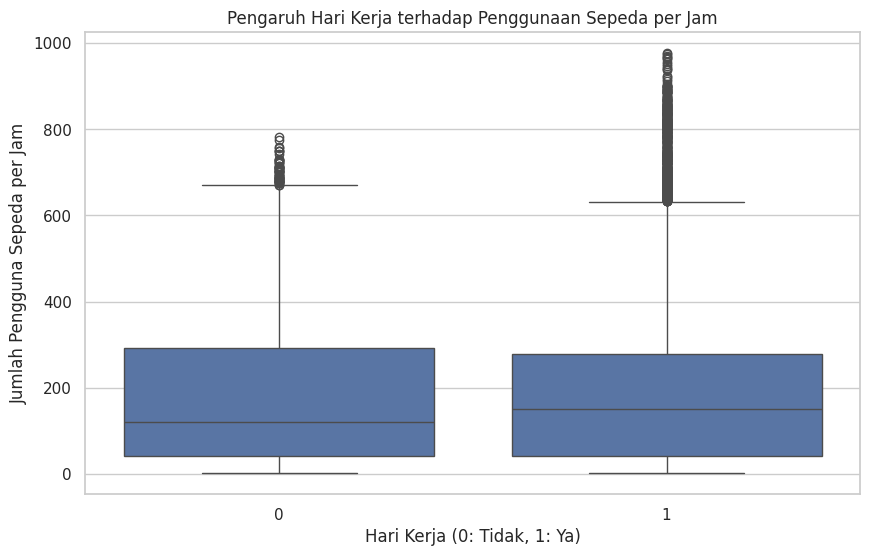

In [11]:
# Visualisasi Pengaruh Hari Kerja terhadap Penggunaan Sepeda per Jam
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=data_hour)
plt.title('Pengaruh Hari Kerja terhadap Penggunaan Sepeda per Jam')
plt.xlabel('Hari Kerja (0: Tidak, 1: Ya)')
plt.ylabel('Jumlah Pengguna Sepeda per Jam')
plt.show()

**Insight:**
- dengan dibuatnya sebuah data kedalam data visualitation, maka pengidentifikasian sebuah data dapat dilakukan dengan mudah tanpa harus membaca langusung dari dataset

## Conclusion

- Conclution pertanyaan 1 >> Cuaca sangat mempengaruhi keputusan orang untuk menggunakan sepeda, dengan kondisi cuaca cerah meningkatkan penggunaan sepeda.
- Conclution pertanyaan 2 >> Hari kerja juga menjadi faktor yang mempengaruhi, di mana penggunaan sepeda lebih intens pada hari kerja dibandingkan hari libur, yang mungkin terkait dengan aktivitas rutin.